Full Name: Tran Dinh Khanh Dang

Student ID: 22520195

**Experiment Requirements (for all datasets)**
- Train - test splitting ratio = 7:3.
- Random_state = 'Your Student ID'.
- Experiment with **Gradient Descent** (*max_iter = 200*, *learning_rate (eta)* is set by yourself) and **Normal Equation**.
- Visualize the cost trend (only for Gradient Descent)
- Evaluation Metric: **R2 score**.
- After completing all requirements, click on ‘Runtime’ and choose ‘Restart and run all’.
- If the code is run without any errors (and the results are the same as before re-running), download the .ipybn file and submit.
Otherwise, check the code carefully.


🐟🐟 **Dataset Information (fish.csv)** 🐟🐟
- Weight: Weight of fish in gram
- Length1: Vertical length in cm
- Length2: Diagonal length in cm
- Length3: Cross length in cm
- Height: Height in cm
- Width: Diagonal width in cm

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the **weight** of fish.


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in Data Preprocessing tutorial file.

In [824]:
# Code here
import numpy as np
import matplotlib.pyplot as plt


In [825]:
# Reading data
import pandas as pd
fish_dataset = pd.read_csv('fish.csv')
fish_dataset.head()

#print(fish_dataset.isna().sum())

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


# Preprocessing

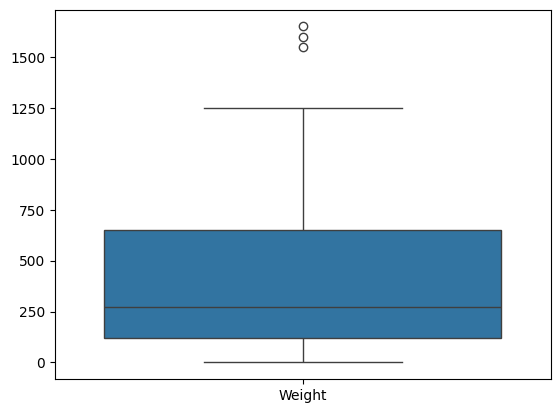

In [826]:
import seaborn as sbn
sbn.boxplot(fish_dataset[['Weight']])

Q1 = fish_dataset['Weight'].quantile(0.25)
Q3 = fish_dataset['Weight'].quantile(0.75)
IQR = Q3 - Q1
low_fence = Q1 - (1.5 * IQR)
up_fence = Q3 + (1.5 * IQR)
fish_dataset[((fish_dataset['Weight'] < low_fence)|(fish_dataset['Weight'] > up_fence))]
data = fish_dataset[~((fish_dataset['Weight'] < low_fence)|(fish_dataset['Weight'] >
up_fence))]

fish_dataset.drop([142, 143, 144])

from sklearn.preprocessing import StandardScaler
min_max_scaler = StandardScaler()
fish_dataset[:] = min_max_scaler.fit_transform(fish_dataset[:])

# Get the data

In [827]:
x = fish_dataset.iloc[:, 1:]
y = fish_dataset[['Weight']]

x = x.values
y = y.values.flatten()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=22520195)

# Implementation

In [828]:
class LinearRegression_GD:
    def __init__(self, eta = 0.001, max_iter = 200, random_state = 22520195):
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.w = None
        self.costs = []

    def predict(self, x):
        return np.dot(x, self.w[1:]) + self.w[0]
    
    def fit(self, x, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc = 0, scale = 0.01, size = 1 + x.shape[1])
        self.costs = []
        for n_iters in range(self.max_iter):
            y_pred = self.predict(x)
            diff = y - y_pred
            self.w[0] += self.eta * np.sum(diff)
            self.w[1:] += self.eta * np.dot(x.T, diff)
            cost = np.sum(diff ** 2) / 2
            self.costs.append(cost)


# Train Model

In [829]:
reg_GD = LinearRegression_GD(eta=1e-3, max_iter=200, random_state=22520195)
reg_GD.fit(x,y)

from sklearn.linear_model import LinearRegression
reg_NE = LinearRegression()
reg_NE.fit(x,y)

LinearRegression()

# Visulization

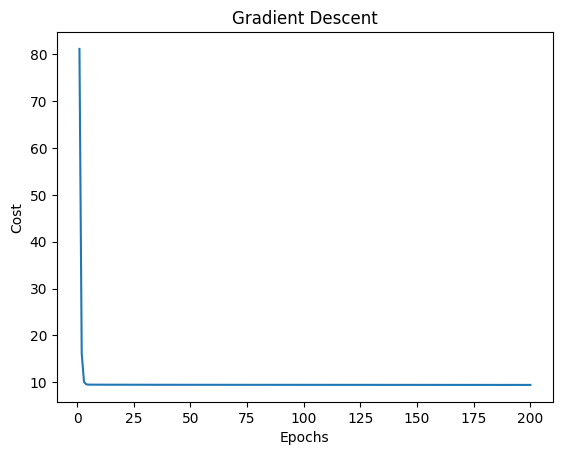

In [830]:
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

# Evaluate R2 Score


In [831]:
from sklearn.metrics import r2_score as R2
y_pred_GD = reg_GD.predict(x)
y_pred_NE = reg_NE.predict(x)
print('R2 of GD:', round(R2(y, y_pred_GD), 6))
print('R2 of NE:', round(R2(y, y_pred_NE), 6))

R2 of GD: 0.881355
R2 of NE: 0.885287


# Insurance Dataset

💰💰 **Dataset Information (insurance.csv)** 💰💰
- age: Age of primary beneficiary
- sex: Insurance contractor gender, female / male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoker / Non-smoker
- region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest
- charges: Individual medical costs billed by health insurance

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the individual medical costs billed by health insurance ('**charges**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

In [832]:
# Code here
import numpy as np
import matplotlib.pyplot as plt


In [833]:
# Reading data
import pandas as pd
fish_dataset = pd.read_csv('insurance.csv')
fish_dataset.head()

#print(fish_dataset.isna().sum())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Preprocessing

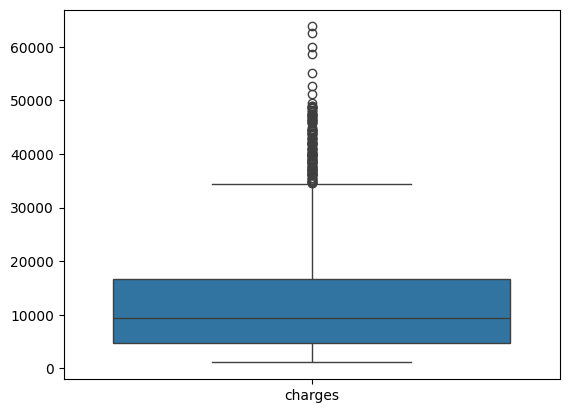

In [834]:
import seaborn as sbn
sbn.boxplot(fish_dataset[['charges']])

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
fish_dataset['sex'] = label_encoder.fit_transform(fish_dataset['sex'])
fish_dataset['smoker'] = label_encoder.fit_transform(fish_dataset['smoker'])
fish_dataset['region'] = label_encoder.fit_transform(fish_dataset['region'])

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
fish_dataset[:] = min_max_scaler.fit_transform(fish_dataset[:])

In [835]:
x = fish_dataset.iloc[:, :-1]
y = fish_dataset[['charges']]

x = x.values
y = y.values.flatten()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=22520195)

In [836]:
reg_GD = LinearRegression_GD(eta=1e-4, max_iter=200, random_state=22520195)
reg_GD.fit(x,y)

from sklearn.linear_model import LinearRegression
reg_NE = LinearRegression()
reg_NE.fit(x,y)

LinearRegression()

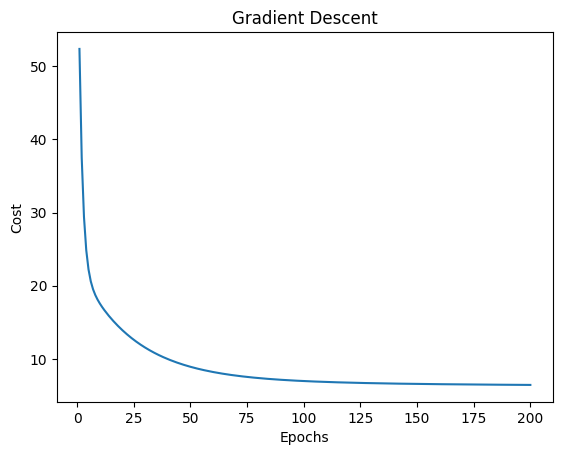

In [837]:
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

In [838]:
from sklearn.metrics import r2_score as R2
y_pred_GD = reg_GD.predict(x)
y_pred_NE = reg_NE.predict(x)
print('R2 of GD:', round(R2(y, y_pred_GD), 6))
print('R2 of NE:', round(R2(y, y_pred_NE), 6))

R2 of GD: 0.741799
R2 of NE: 0.750737


# Tesla Stock Dataset

📈📈 **Dataset Information (tesla_stock.csv)** 📈📈
- Open: The opening price of the stock
- High: The high price of that day
- Low: The low price of that day
- Close: The closed price of that day
- Volume: The amount of stocks traded during that day

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to predict the closing price of tesla stock ('**Close**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

In [839]:
# Code here
# Code here
import numpy as np
import matplotlib.pyplot as plt


In [840]:
# Reading data
import pandas as pd
fish_dataset = pd.read_csv('tesla_stock.csv')
fish_dataset.head()

#print(fish_dataset.isna().sum())

,Open,High,Low,Close,Volume
0,19.000000,25.00,17.540001,23.889999,18766300
1,25.790001,30.42,23.299999,23.830000,17187100
2,25.000000,25.92,20.270000,21.959999,8218800
3,23.000000,23.10,18.709999,19.200001,5139800
4,20.000000,20.00,15.830000,16.110001,6866900


In [841]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
fish_dataset[:] = min_max_scaler.fit_transform(fish_dataset[:])

In [842]:
x = fish_dataset.iloc[:, [0, 1, 2, 4]]
y = fish_dataset[['Close']]

#print(x)

x = x.values
y = y.values.flatten()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=22520195)

In [843]:
reg_GD = LinearRegression_GD(eta=1e-4, max_iter=200, random_state=22520195)
reg_GD.fit(x,y)

from sklearn.linear_model import LinearRegression
reg_NE = LinearRegression()
reg_NE.fit(x,y)

LinearRegression()

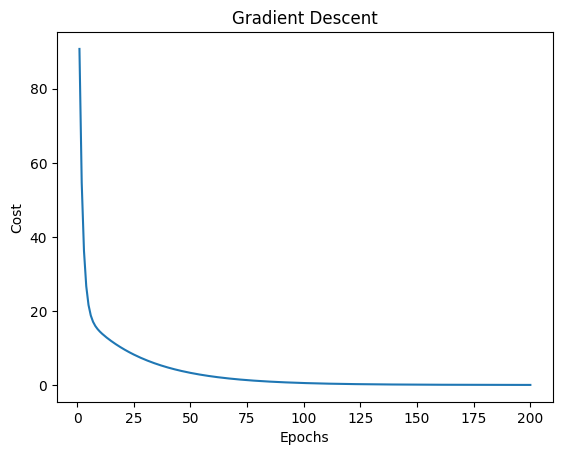

In [844]:
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

In [845]:
from sklearn.metrics import r2_score as R2
y_pred_GD = reg_GD.predict(x)
y_pred_NE = reg_NE.predict(x)
print('R2 of GD:', round(R2(y, y_pred_GD), 6))
print('R2 of NE:', round(R2(y, y_pred_NE), 6))

R2 of GD: 0.997621
R2 of NE: 0.99971
